In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# creating the input array
X=np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])

# converting the input in matrix form
X = X.T
print ('\n Input:')
print(X)

# shape of input array
print('\n Shape of Input:', X.shape)


 Input:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input: (4, 3)


In [3]:
# creating the output array
y=np.array([[1],[1],[0]])

# output in matrix form
y = y.T

print ('\n Actual Output:')
print(y)

# shape of output array
print('\n Shape of Output:', y.shape)


 Actual Output:
[[1 1 0]]

 Shape of Output: (1, 3)


In [4]:
# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [5]:
# defining the hyperparameters of the model
lr=0.01 # learning rate
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

epochs = 10000 # number of epochs

In [6]:
# initializing weight
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

In [7]:
# defining the momentum parameters
beta = 0.9
v_ho = 0
v_ih = 0

In [8]:
error_momentum = []
for i in range(epochs):
    # Forward Propogation
    
    # hidden layer activations
    hidden_layer_input=np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)    
    # calculating the output
    output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    
    # Backward Propagation
    
    # calculating error
    error = np.square(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = np.multiply(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between output and hidden layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

    # weighted gradient
    v_ho = beta * v_ho + (1-beta)*error_wrt_who
    w_ho = w_ho - lr * v_ho
    v_ih = beta * v_ih + (1-beta)*error_wrt_wih
    w_ih = w_ih - lr * v_ih
    
    # appending the error of each epoch
    error_momentum.append(np.average(error))

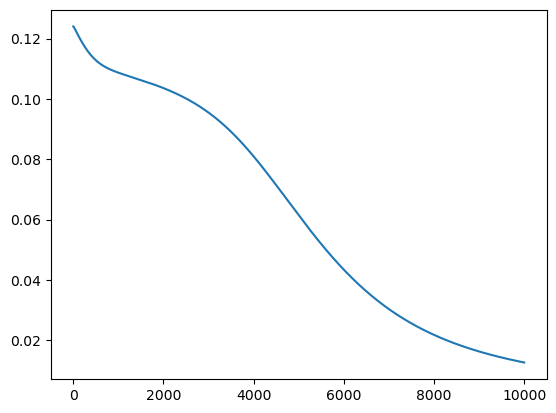

In [9]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_momentum))